# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tp
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('creditcard.csv')
df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

 So the datatype of variables are same

In [18]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So there is no empty value

In [19]:
#As time coulumn is unnecessary, we should drop it.
df = df.drop("Time", axis=1)
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [25]:
#Standardize Amount
mean = df['Amount'].mean()
df['Amount']-=mean
std = df['Amount'].std()
df['Amount']/= std

df['Amount']

0         0.244964
1        -0.342474
2         1.160684
3         0.140534
4        -0.073403
            ...   
284802   -0.350150
284803   -0.254116
284804   -0.081839
284805   -0.313248
284806    0.514354
Name: Amount, Length: 284807, dtype: float64

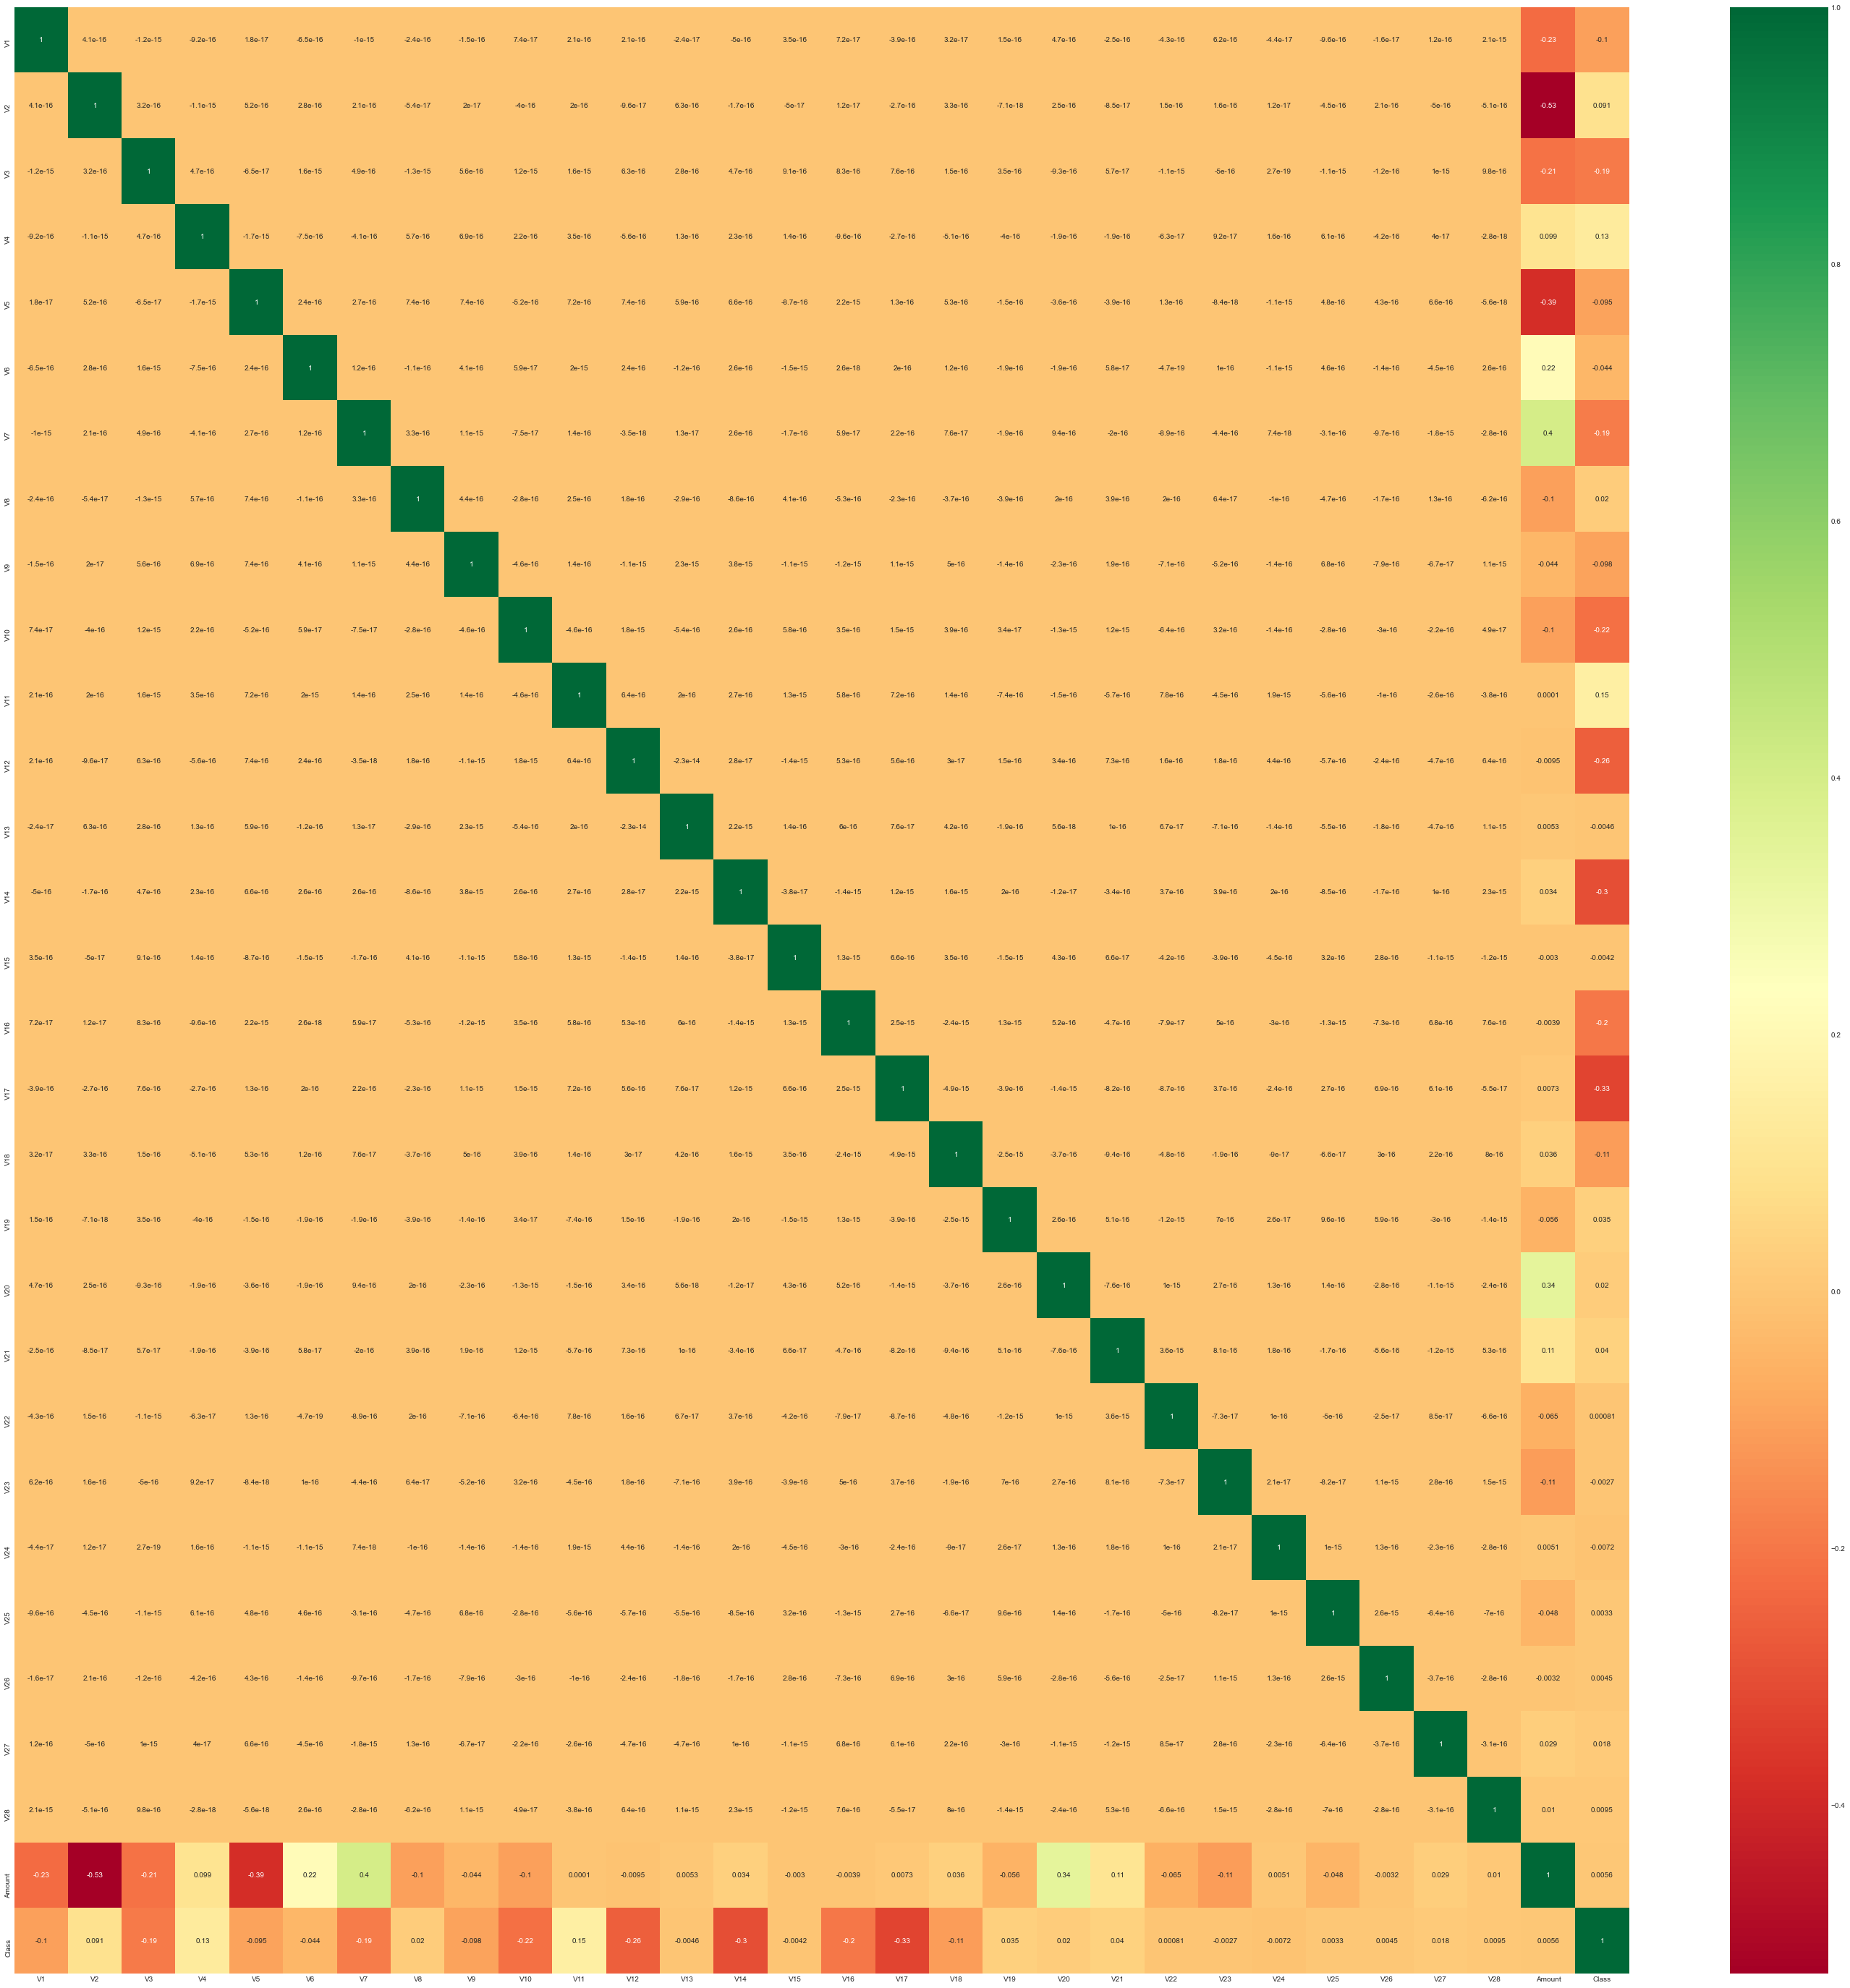

In [58]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
 

corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Splitting data

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

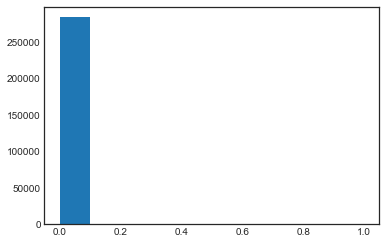

In [59]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.hist(df['Class'])


As we can see the output is mostly "0" or Not-Fraud. So in order to deal with unbalance data, we use

In [60]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [61]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)
df_shuffled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-3.739637,-4.561610,1.206257,-1.625742,1.347498,-1.824348,-2.532404,0.834983,-2.271700,0.551127,...,0.067362,-1.165516,-0.004171,-0.517218,0.188907,-0.377136,-0.019116,-0.627285,0.006398,0
1,1.142695,-1.520885,0.266372,-1.157357,-1.662631,-0.735056,-0.735720,-0.188560,-1.888360,1.346040,...,0.040980,0.177285,-0.118648,0.398615,0.327298,-0.090581,0.009818,0.045240,0.358629,0
2,1.477764,-0.670452,-2.018248,1.384340,0.482617,-0.319192,0.849105,-0.255585,-0.125773,0.290602,...,0.261215,0.305258,-0.212627,0.726562,0.350042,-0.571755,-0.073001,-0.018020,0.750241,0
3,-0.484372,-0.070181,0.292129,-2.387101,-0.277986,0.067542,-0.557848,0.636576,-0.846288,-0.046181,...,0.360617,0.899137,-0.254406,-1.068268,0.329099,-0.109945,0.092129,-0.098966,-0.233486,0
4,-0.588565,0.011648,0.208959,-2.482494,1.208622,0.906178,0.803615,0.326183,0.868206,-1.788906,...,0.431346,1.556139,-0.265059,-0.217967,0.016249,0.875934,0.098607,0.134826,-0.173315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-2.978690,2.970865,0.569973,-0.629146,-0.328428,-1.250420,1.288408,-0.643412,2.459953,4.023319,...,-0.836568,-0.786581,-0.010989,0.613375,0.299467,-0.033616,0.553934,-0.282487,-0.281303,0
284803,1.993333,-0.483626,-2.673126,-0.568955,2.362369,3.346008,-0.504006,0.759848,0.377387,0.182925,...,0.300757,0.867400,-0.002060,0.779008,0.209813,0.597852,-0.046115,-0.067683,-0.220293,0
284804,-0.664400,0.455036,-0.169601,0.969196,1.451949,-0.551271,1.224144,-0.117411,-0.927892,0.141487,...,0.240397,0.702672,-0.053798,-0.381440,0.106799,-0.375501,0.390105,0.247320,-0.001398,0
284805,0.070377,1.331542,-1.005168,-0.049887,0.454047,-1.324636,0.675165,-0.005486,-0.349763,-1.068462,...,0.365799,1.113360,-0.094314,-0.036001,-0.235862,-0.164466,-0.183576,-0.049989,-0.321404,0


In [69]:
df_shuff= df_shuffled.values
df_shuff

array([[-3.73963678e+00, -4.56160974e+00,  1.20625703e+00, ...,
        -6.27285229e-01,  6.39844894e-03,  0.00000000e+00],
       [ 1.14269451e+00, -1.52088466e+00,  2.66371849e-01, ...,
         4.52395618e-02,  3.58629224e-01,  0.00000000e+00],
       [ 1.47776379e+00, -6.70452088e-01, -2.01824751e+00, ...,
        -1.80198438e-02,  7.50241079e-01,  0.00000000e+00],
       ...,
       [-6.64399508e-01,  4.55035618e-01, -1.69601031e-01, ...,
         2.47319972e-01, -1.39780545e-03,  0.00000000e+00],
       [ 7.03774108e-02,  1.33154203e+00, -1.00516796e+00, ...,
        -4.99894818e-02, -3.21404063e-01,  0.00000000e+00],
       [-2.41393752e+00,  1.97666391e+00,  5.99236907e-01, ...,
         1.07199833e-01, -3.46072211e-01,  0.00000000e+00]])

In [72]:
train_data= df_shuff[:142403,:29]
train_data[:,] , train_data.shape

(array([[-3.73963678, -4.56160974,  1.20625703, ..., -0.0191165 ,
         -0.62728523,  0.00639845],
        [ 1.14269451, -1.52088466,  0.26637185, ...,  0.00981821,
          0.04523956,  0.35862922],
        [ 1.47776379, -0.67045209, -2.01824751, ..., -0.07300114,
         -0.01801984,  0.75024108],
        ...,
        [-1.2106325 ,  1.51523796,  1.01097332, ...,  0.3323897 ,
          0.24444673, -0.32904039],
        [ 1.19477877,  0.21699306,  0.15274096, ..., -0.01359733,
          0.01278311, -0.34967048],
        [-1.18059551, -0.40032575,  1.88015141, ..., -0.03505009,
          0.10883118,  0.76587357]]),
 (142403, 29))

In [73]:
test_data= df_shuff[142403:227845,:29]
test_data , test_data.shape

(array([[-1.22794735,  1.06698877,  1.30859797, ...,  0.22596651,
          0.15993913, -0.33511747],
        [ 1.1694646 ,  0.36952895,  0.53067651, ...,  0.04395873,
          0.02453268, -0.32964011],
        [-2.89010659,  1.05728298,  1.6342494 , ...,  0.7792541 ,
          0.71344363,  0.04657914],
        ...,
        [-6.99986273,  5.66037796, -1.94292626, ...,  1.32398057,
          0.29430289, -0.28130333],
        [-1.95477244,  0.94761161,  0.89482812, ..., -0.44857902,
         -0.19511756, -0.33043972],
        [-0.90396252,  0.64131686,  2.01165604, ..., -0.13651985,
         -0.05214128, -0.05337283]]),
 (85442, 29))

In [74]:
val_data= df_shuff[227845:,:29]
val_data , val_data.shape

(array([[-7.96535131e-01,  4.64487193e-01,  6.13425656e-01, ...,
          1.21147638e-01,  1.76837682e-01,  2.75549139e-01],
        [ 1.85271173e+00, -3.88597165e-01, -1.27154226e-01, ...,
          6.86699934e-02, -2.12617330e-02, -2.02821034e-01],
        [ 9.24070298e-01, -4.28794933e-01,  1.29081418e+00, ...,
         -9.56768885e-03,  5.35469738e-02,  1.74517678e-01],
        ...,
        [-6.64399508e-01,  4.55035618e-01, -1.69601031e-01, ...,
          3.90104616e-01,  2.47319972e-01, -1.39780545e-03],
        [ 7.03774108e-02,  1.33154203e+00, -1.00516796e+00, ...,
         -1.83576340e-01, -4.99894818e-02, -3.21404063e-01],
        [-2.41393752e+00,  1.97666391e+00,  5.99236907e-01, ...,
          1.19991427e-01,  1.07199833e-01, -3.46072211e-01]]),
 (56962, 29))

In [75]:
train_label= df_shuff[:142403,29]
train_label , train_label.shape

(array([0., 0., 0., ..., 0., 0., 0.]), (142403,))

In [76]:
test_label = df_shuff[142403:227845,29]
test_label , test_label.shape

(array([0., 0., 0., ..., 0., 0., 0.]), (85442,))

In [77]:
val_label = df_shuff[227845:,29]
val_label , val_label.shape    

(array([0., 0., 0., ..., 0., 0., 0.]), (56962,))

# Model :

In [78]:

from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [79]:
model =  build_model()
history = model.fit(train_data,train_label,epochs=100,batch_size=512,validation_data=(val_data,val_label ))

Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 0.2478 - acc: 0.9345 - val_loss: 0.0150 - val_acc: 0.9983
Epoch 2/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.9990 - val_loss: 0.0056 - val_acc: 0.9992
Epoch 3/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9993 - val_loss: 0.0048 - val_acc: 0.9993
Epoch 4/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 5/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 6/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0042 - val_acc: 0.9994
Epoch 7/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0042 - val_acc: 0.9993
Epoch 8/100
279/279 [==============================] - 0s 1ms/step - 

279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0048 - val_acc: 0.9993
Epoch 63/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0049 - val_acc: 0.9992
Epoch 64/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0049 - val_acc: 0.9993
Epoch 65/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0051 - val_acc: 0.9993
Epoch 66/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0050 - val_acc: 0.9993
Epoch 67/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0049 - val_acc: 0.9992
Epoch 68/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0050 - val_acc: 0.9993
Epoch 69/100
279/279 [==============================] - 0s 1ms/step - loss:

In [80]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

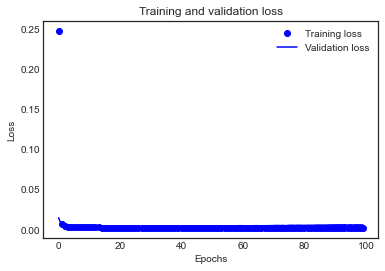

In [95]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(100)

plt.plot(epochs, loss_values,'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


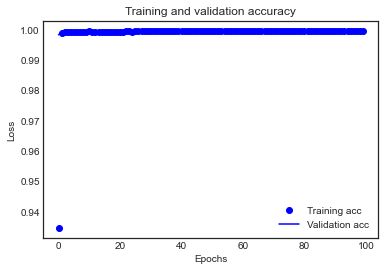

In [88]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
predictions = model.predict(test_data)

In [97]:
predictions.shape

(85442, 1)

In [99]:
output_df = pd.DataFrame({'Actual': test_label, 'Prediction': np.round(predictions.reshape(85442))})

In [136]:
output_df

,Actual,Prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
85437,0.0,0.0
85438,0.0,0.0
85439,0.0,0.0
85440,0.0,0.0


In [131]:
output_df['Actual'].value_counts()

0.0    85291
1.0      151
Name: Actual, dtype: int64

In [128]:
output_df['Prediction'].value_counts()


0.0    85303
1.0      139
Name: Prediction, dtype: int64

In [116]:
output_df.iloc[99]

Actual        1.0
Prediction    1.0
Name: 99, dtype: float64